In [2]:
import pandas as pd
#import matplotlib.pyplot as plt
import seaborn as sns
from pylab import*
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, export_graphviz, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston

In [77]:
!python --version

Python 3.8.8


In [4]:
data = load_boston()
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
X = pd.DataFrame(data['data'], columns = data['feature_names'])
X
#X.head()
#X.shape

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


### Question 1: What type of Machine Learning Problem is this?
This is a supervised machine learning

In [6]:
y = pd.DataFrame(data['target'], columns=['MEDV'])
y.size

506

In [7]:
# Process of splitting the data

x = X.iloc[:,:].values
Y=y[['MEDV']].values
x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=0.5,random_state=0)
x_train

array([[5.75290e-01, 0.00000e+00, 6.20000e+00, ..., 1.74000e+01,
        3.85910e+02, 2.47000e+00],
       [3.29820e-01, 0.00000e+00, 2.18900e+01, ..., 2.12000e+01,
        3.88690e+02, 1.50300e+01],
       [1.15172e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.58770e+02, 1.83500e+01],
       ...,
       [1.50980e-01, 0.00000e+00, 1.00100e+01, ..., 1.78000e+01,
        3.94510e+02, 1.03000e+01],
       [2.29270e-01, 0.00000e+00, 6.91000e+00, ..., 1.79000e+01,
        3.92740e+02, 1.88000e+01],
       [1.39140e-01, 0.00000e+00, 4.05000e+00, ..., 1.66000e+01,
        3.96900e+02, 1.46900e+01]])

### Question 3: How many houses are in the training and test sets? And how many features are there? Print them to the screen.

In [8]:
len(x_train), len(x_test)
print("There are",len(x_train), "houses in the training set and", len(x_test), "in the test set")

There are 253 houses in the training set and 253 in the test set


### Question 4: Using DecisionTreeRegressor, Fit a Decision Tree to the training data; with maximum tree depth set to 3. Make sure to set a random seed.

In [9]:
# Create the regressor object
regressor = DecisionTreeRegressor(max_depth=3, random_state = 1)

In [10]:
#Fit the regressor with x and Y
regressor.fit(x_train,Y_train)

DecisionTreeRegressor(max_depth=3, random_state=1)

In [11]:
Y_predict = regressor.predict(x_test)
Y_predict

array([28.00769231, 20.78378378, 20.78378378, 11.67222222, 20.78378378,
       20.78378378, 20.78378378, 20.78378378, 20.78378378, 20.78378378,
       11.67222222, 11.67222222, 16.83409091, 11.67222222, 48.63636364,
       28.00769231, 20.78378378, 28.00769231, 28.00769231, 20.78378378,
       28.00769231, 20.78378378, 20.78378378, 28.00769231, 20.78378378,
       20.78378378, 20.78378378, 11.67222222, 41.25714286, 16.83409091,
       16.83409091, 20.78378378, 20.78378378, 20.78378378, 20.78378378,
       20.78378378, 11.67222222, 20.78378378, 16.83409091, 16.83409091,
       20.78378378, 20.78378378, 20.78378378, 16.83409091, 26.01538462,
       20.78378378, 16.83409091, 11.67222222, 11.67222222, 26.01538462,
       11.67222222, 16.83409091, 20.78378378, 41.25714286, 16.83409091,
       16.83409091, 20.78378378, 20.78378378, 20.78378378, 16.83409091,
       28.00769231, 20.78378378, 28.00769231, 28.00769231, 20.78378378,
       28.00769231, 16.83409091, 16.83409091, 11.67222222, 20.78

In [12]:
df=pd.DataFrame({'Actuel':Y_test.flatten(),'Predicted':Y_predict.flatten()})
print(df)

     Actuel  Predicted
0      22.6  28.007692
1      50.0  20.783784
2      23.0  20.783784
3       8.3  11.672222
4      21.2  20.783784
..      ...        ...
248    32.2  26.015385
249    13.5  16.834091
250    17.9  11.672222
251    13.3  11.672222
252    11.7  16.834091

[253 rows x 2 columns]


### Use the trained model to predict prices for the houses in the test set. Plot y-predicted (x-axis) vs y-actual on a scatter plot. Add a line to represent where perfect predictions would be.

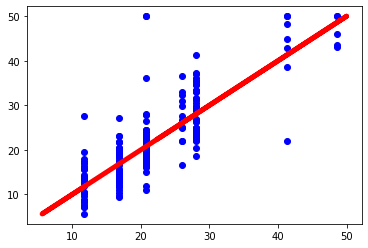

In [13]:
plt.scatter(Y_predict,Y_test,color='b')
plt.plot(Y_test,Y_test,color='r',linewidth=5)

 ### Question 6: Visualize the Tree that has been fit to the training data using the plot_tree function

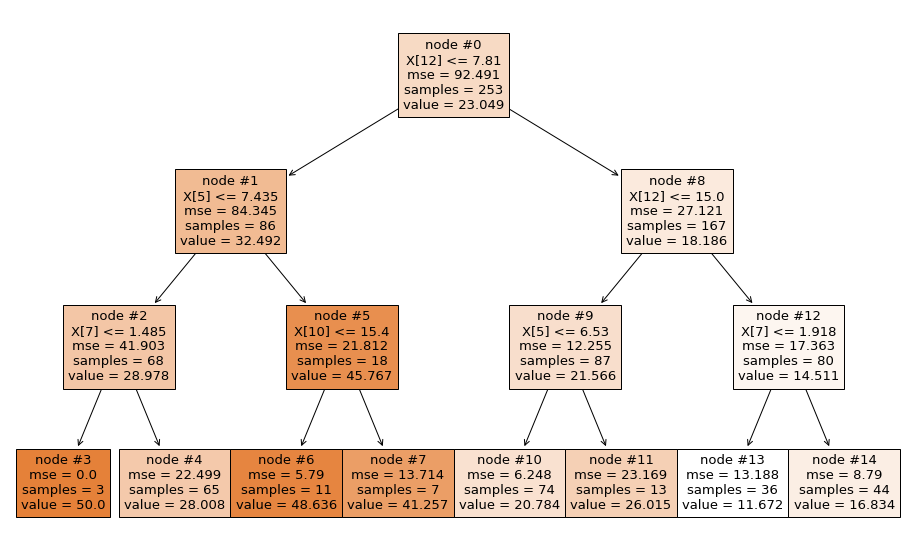

In [14]:
fig = plt.figure(figsize=(16,10))
plot_tree(regressor, node_ids = True, filled=True)
plt.show()

### Question 7: Use Mean Squared Error (MSE) to calculate the test error

In [15]:
mean_squared_error(Y_test, Y_predict)

26.02323085009744

# Ensemble MethodS: Bagging and Random Forests

In [16]:
# Bagging: using all features
new_regressor=RandomForestRegressor(max_features =13, random_state=0)
new_regressor.fit(x_train,Y_train.ravel())

RandomForestRegressor(max_features=13, random_state=0)

### Question 8:

In [17]:
Y_new_predict = new_regressor.predict(x_test)
Y_new_predict

array([23.432, 24.176, 22.034,  9.98 , 20.721, 21.059, 21.07 , 19.86 ,
       19.874, 18.68 ,  8.834, 11.578, 14.587,  9.38 , 49.032, 34.49 ,
       20.991, 34.926, 27.275, 21.364, 23.493, 19.942, 19.908, 24.412,
       21.175, 17.344, 19.304, 16.206, 41.417, 18.374, 14.773, 19.466,
       20.977, 21.361, 22.906, 18.936,  8.587, 23.877, 14.747, 13.882,
       23.028, 20.774, 21.98 , 14.678, 24.677, 22.216, 21.372, 16.921,
       14.817, 24.702, 16.894, 19.688, 20.009, 42.852, 14.808, 20.066,
       20.366, 19.021, 21.679, 19.558, 21.354, 21.37 , 31.801, 29.094,
       20.503, 28.819, 16.63 , 17.697, 12.045, 21.67 , 20.2  , 22.008,
       25.871, 30.674, 28.553,  9.881, 42.374, 21.919, 22.544, 19.348,
       27.848, 19.242, 19.911, 41.851, 41.319, 24.21 , 22.789, 15.511,
       27.096, 16.91 , 19.874, 13.712, 23.296, 29.508, 21.05 , 22.27 ,
       11.051, 24.031, 15.731, 19.415, 23.625, 20.129, 27.454, 21.249,
       27.171, 20.144,  9.014, 18.416, 21.567, 22.787, 34.816,  9.733,
      

In [18]:
df1=pd.DataFrame({'Actuel':Y_test.flatten(),'Predicted':Y_new_predict.flatten()})
print(df1)

     Actuel  Predicted
0      22.6     23.432
1      50.0     24.176
2      23.0     22.034
3       8.3      9.980
4      21.2     20.721
..      ...        ...
248    32.2     30.990
249    13.5     14.423
250    17.9      9.343
251    13.3     12.428
252    11.7     15.649

[253 rows x 2 columns]


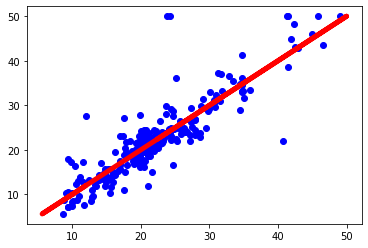

In [19]:
plt.scatter(Y_new_predict,Y_test,color='b')
plt.plot(Y_test,Y_test,color='r',linewidth=5)

### Question 9

In [20]:
mean_squared_error (Y_test,Y_new_predict)

16.108427276679844

In [21]:
regr2 = RandomForestRegressor(max_features=6, random_state=0)
regr2.fit(x_train, Y_train.ravel())

RandomForestRegressor(max_features=6, random_state=0)

In [22]:
y_new_pred1 = regr2.predict(x_test)
y_new_pred1

array([23.912, 22.482, 22.2  , 10.12 , 21.145, 21.038, 20.827, 19.929,
       20.873, 18.875,  9.531, 12.811, 14.991,  8.879, 48.528, 34.609,
       20.791, 36.443, 27.214, 20.957, 23.339, 19.924, 20.097, 24.764,
       21.021, 17.279, 18.475, 16.464, 40.887, 18.987, 15.161, 18.701,
       21.251, 21.203, 23.454, 18.498,  8.862, 21.226, 15.259, 14.485,
       23.517, 20.978, 21.86 , 15.858, 23.656, 22.666, 20.652, 16.925,
       16.168, 23.596, 16.862, 20.283, 20.75 , 39.962, 15.435, 20.398,
       20.552, 18.615, 19.777, 19.576, 22.577, 21.279, 31.067, 30.492,
       19.804, 28.664, 15.999, 18.705, 14.244, 21.861, 20.886, 22.552,
       26.645, 30.586, 25.878,  9.664, 42.42 , 22.209, 23.702, 19.511,
       27.198, 18.499, 18.222, 41.536, 40.666, 24.449, 24.09 , 16.859,
       25.436, 16.948, 19.975, 13.271, 23.866, 29.976, 21.523, 22.676,
       12.04 , 24.062, 16.145, 18.743, 23.726, 19.529, 27.425, 21.767,
       26.101, 20.218,  9.156, 17.614, 21.658, 23.59 , 35.532, 11.789,
      

In [23]:
mean_squared_error (Y_test,y_new_pred1)

16.0181136798419

In [24]:
X.insert(13,'MEDV',y)

In [ ]:
X.corr()

In [1]:
# cols=data['feature_names']
# y = 'MEDV'
# fig = plt.figure(figsize=(16,10))
# for i in range(1,13):
#     x=cols[i-1]
#     plt.subplot(7,2,i)
#     plt.plot(x,y)  
# plt.show()